In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
df = pd.read_csv('dataset.csv')

In [49]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Prétraitement des données

In [50]:
df= df.drop(["Unnamed: 0"],axis = 1)

In [51]:
df.shape

(114000, 20)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [53]:
df[df.isnull().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [54]:
df = df.dropna(axis=0)

In [55]:
df["explicit"]=df["explicit"].astype(int) #convertir True en 1 et false en 0

In [56]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of                       track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Ri

In [57]:
num_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]] #sélection des colonnes numériques
num_cols.shape

(113999, 15)

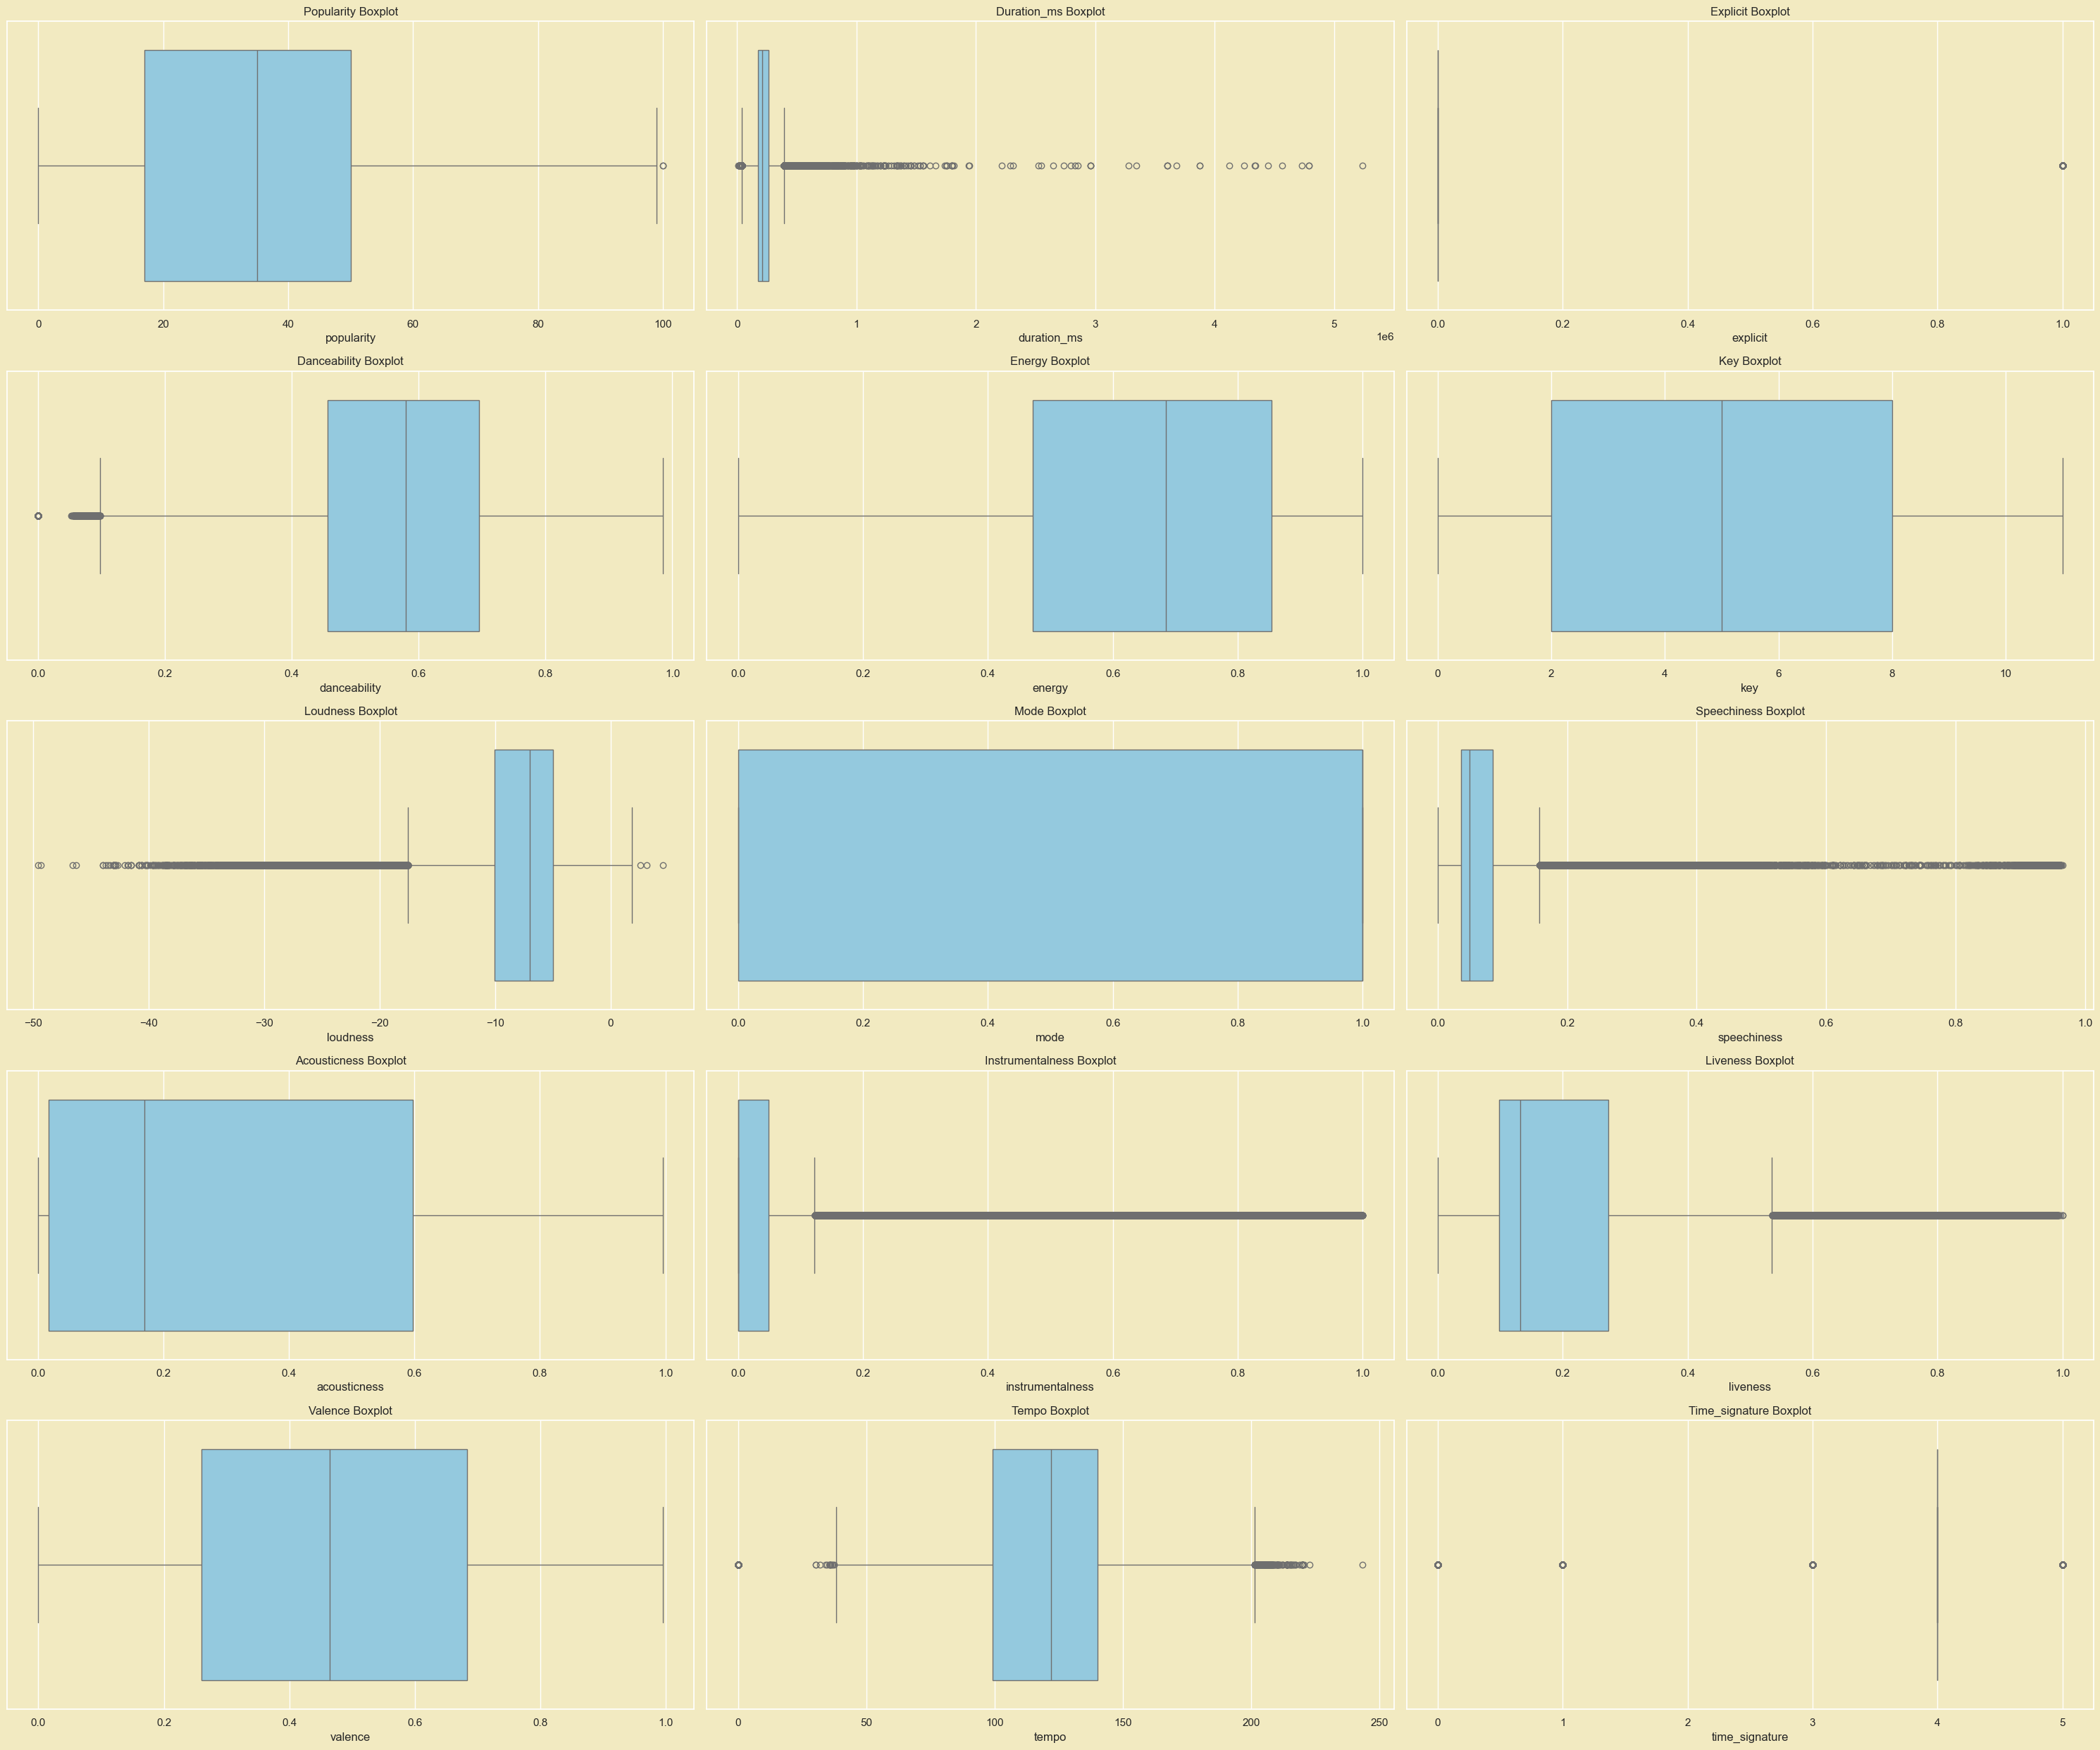

In [58]:
# Boxplots pour la détection des valeurs aberrantes dans les caractéristiques numériques
plt.figure(figsize=(30, 25))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'{col.capitalize()} Boxplot')
plt.tight_layout()
plt.show()

In [59]:
#Appliquer directement le traitement des valeurs aberrantes à chaque colonne
for feature in num_cols:
    # Calcul des quartiles Q1 (25%) et Q3 (75%)
    Qan1 = df[feature].quantile(0.25)
    Qan3 = df[feature].quantile(0.75)
    
    # Calcul de l'IQR (intervalle interquartile)
    IQR = Qan3 - Qan1
    
    # Définir les limites inférieure et supérieure pour les valeurs aberrantes
    lower_limit = Qan1 - 1.5 * IQR  # Fac de 1.5, ajustable
    upper_limit = Qan3 + 1.5 * IQR  # Fac de 1.5, ajustable
    
    # Remplacer les valeurs aberrantes par la moyenne de la colonne
    df.loc[(df[feature] < lower_limit) | (df[feature] > upper_limit), feature] = df[feature].mean()



C:\Users\Maha ben aissa\AppData\Local\Temp\ipykernel_12364\167648815.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33.23882665637418' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[feature] < lower_limit) | (df[feature] > upper_limit), feature] = df[feature].mean()
C:\Users\Maha ben aissa\AppData\Local\Temp\ipykernel_12364\167648815.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '228031.15338731042' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[feature] < lower_limit) | (df[feature] > upper_limit), feature] = df[feature].mean()
C:\Users\Maha ben aissa\AppData\Local\Temp\ipykernel_12364\167648815.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future ve

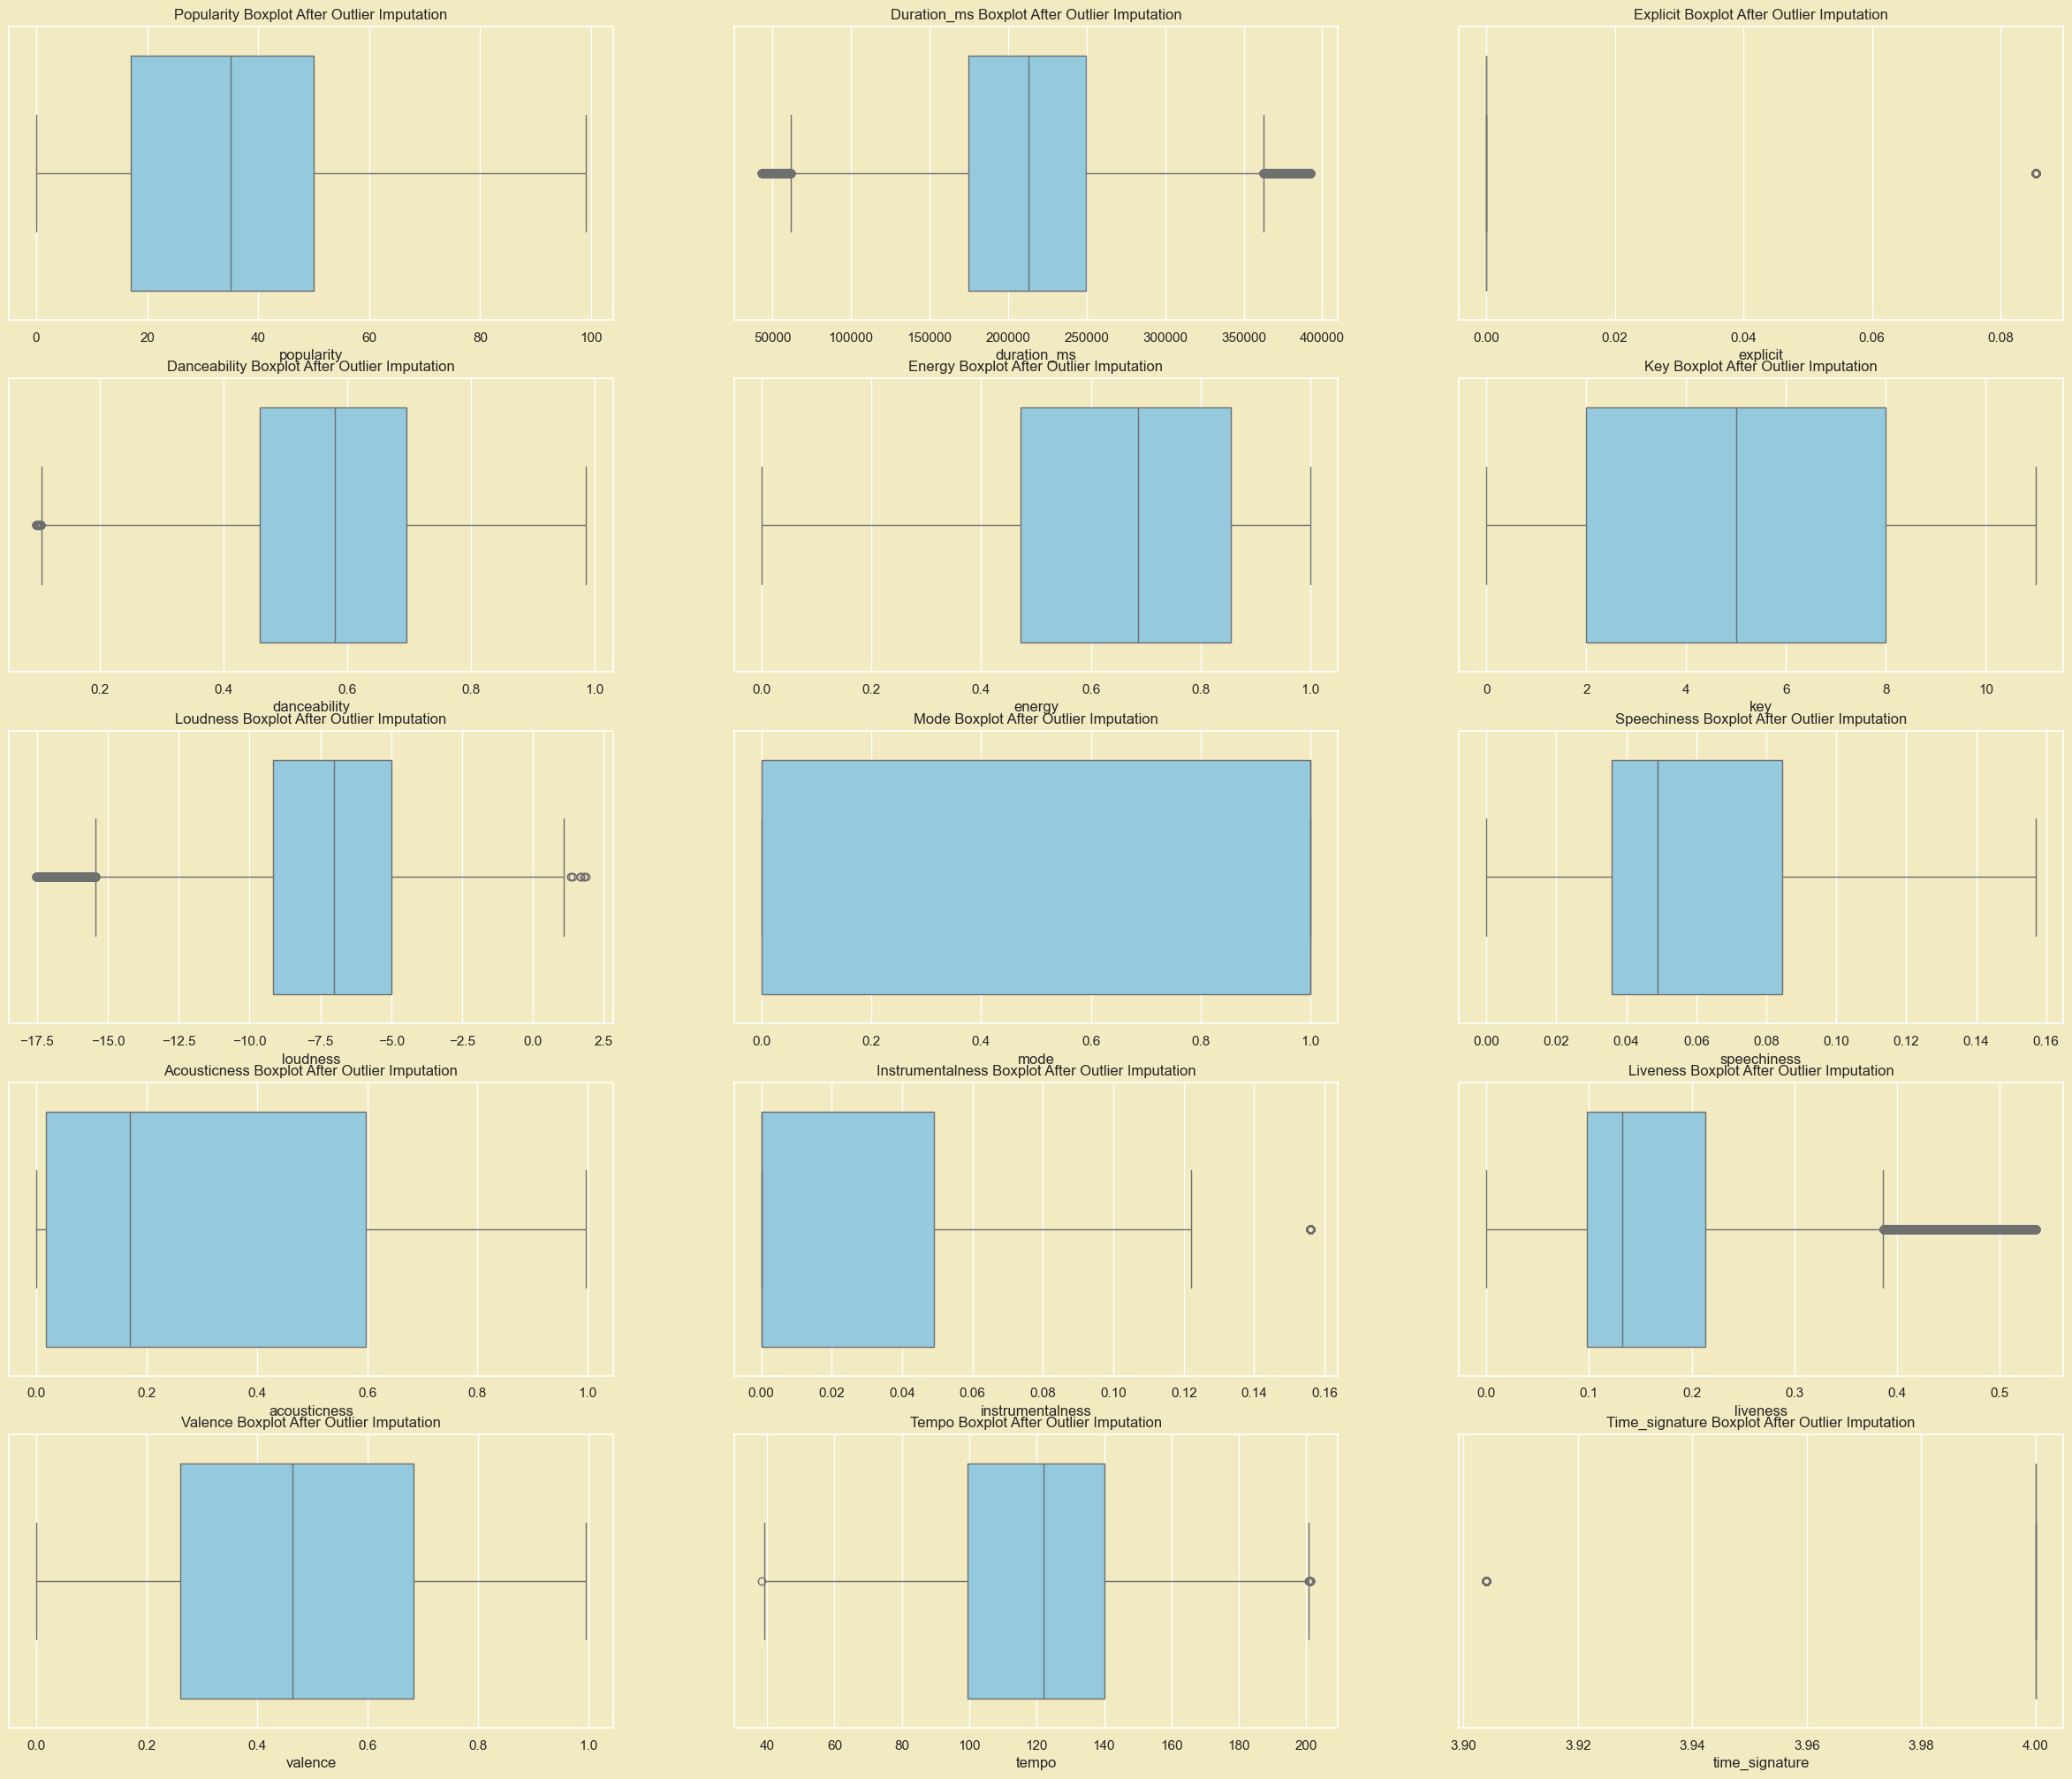

In [60]:
# Définir la taille de la figure
plt.figure(figsize=(30, 25))

# Tracer les boxplots après l'imputation des valeurs aberrantes
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 3, i)  # Ajuster dynamiquement les sous-graphiques
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'{col.capitalize()} Boxplot After Outlier Imputation')

Analyse exploratoire des données

In [61]:
df.describe().style.background_gradient(cmap="Accent") # Décrire les données en marquant les valeurs maximales

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.237655,215229.197970,0.007310,0.569568,0.641383,5.309126,-7.440848,0.637558,0.058752,0.314907,0.038375,0.172180,0.474066,121.996918,3.989766
std,22.303206,62153.948879,0.023908,0.169395,0.251530,3.559999,3.297766,0.480708,0.028757,0.332522,0.064469,0.102589,0.259261,29.147601,0.029621
min,0.000000,42906.000000,0.000000,0.097600,0.000000,0.000000,-17.528000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.281000,3.904034
25%,17.000000,174552.000000,0.000000,0.459000,0.472000,2.000000,-9.178000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.515000,4.000000
50%,35.000000,213279.000000,0.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.032000,4.000000
75%,50.000000,249713.000000,0.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.213554,0.683000,140.025000,4.000000
max,99.000000,392656.000000,0.085501,0.985000,1.000000,11.000000,1.864000,1.000000,0.157000,0.996000,0.156051,0.535000,0.995000,201.327000,4.000000


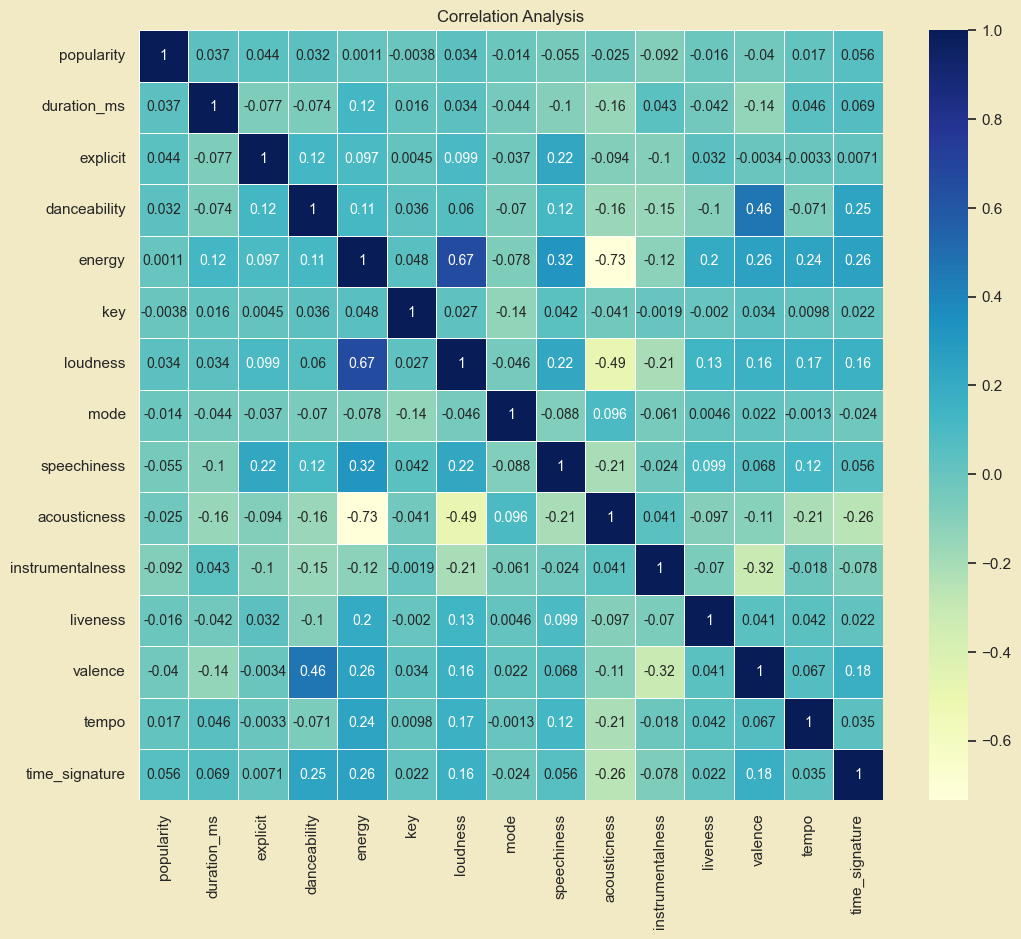

In [62]:
# Création de la matrice de corrélation
corr_mat = df.select_dtypes(include=["int", "float"]).corr()

plt.figure(figsize=(12, 10), facecolor='#F2EAC5', edgecolor='black')
ax = plt.axes()
ax.set_facecolor('#F2EAC5')
sns.heatmap(corr_mat, annot=True, cmap='YlGnBu', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Analysis')
plt.show()


In [63]:
num_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]] #sélection des colonnes numériques
num_cols.shape

(113999, 15)

In [64]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113999 non-null  float64
 1   duration_ms       113999 non-null  float64
 2   explicit          113999 non-null  float64
 3   danceability      113999 non-null  float64
 4   energy            113999 non-null  float64
 5   key               113999 non-null  float64
 6   loudness          113999 non-null  float64
 7   mode              113999 non-null  float64
 8   speechiness       113999 non-null  float64
 9   acousticness      113999 non-null  float64
 10  instrumentalness  113999 non-null  float64
 11  liveness          113999 non-null  float64
 12  valence           113999 non-null  float64
 13  tempo             113999 non-null  float64
 14  time_signature    113999 non-null  float64
dtypes: float64(15)
memory usage: 13.9 MB


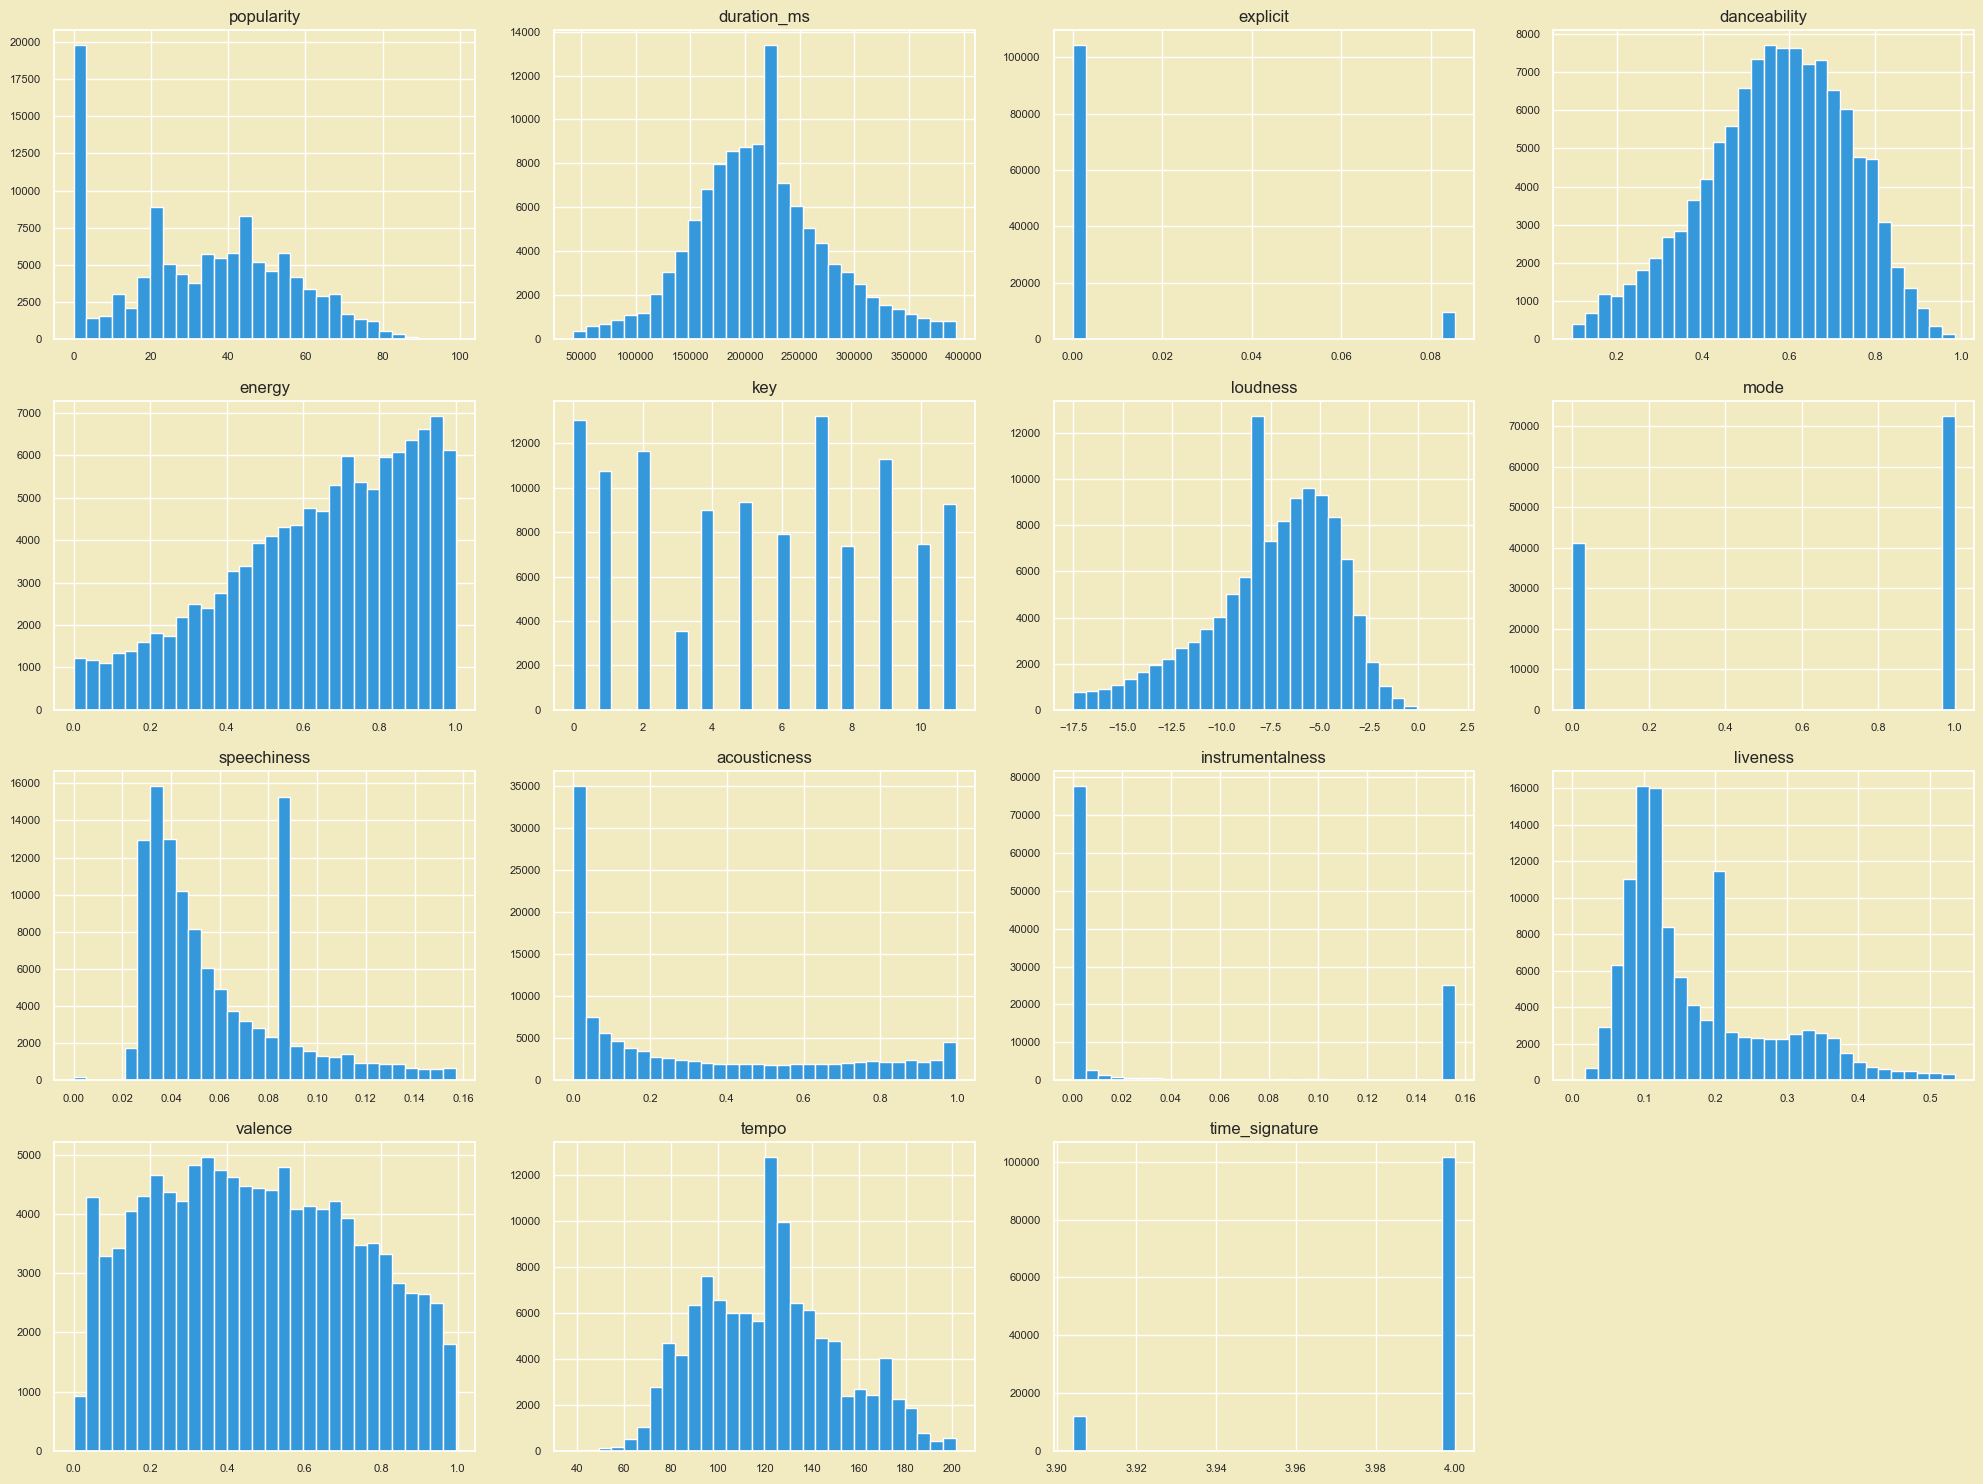

In [65]:
# Distribution des colonnes numériques
sns.set_style('whitegrid')
sns.set(rc={"axes.facecolor":"#F2EAC1","figure.facecolor":"#F2EAC1"}) 

num_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8, color='#3498db') 

plt.tight_layout()
plt.show()

clustering

In [66]:
# Sélection des variables pertinents pour le clustering
features = df[['danceability','energy', 'loudness', 'valence', 'tempo']] 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [67]:
#modèle de clustering
kmeans = KMeans(n_clusters=6, random_state=48) 
df['cluster'] = kmeans.fit_predict(scaled_features)

In [68]:
#PCA pour la visualisation
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

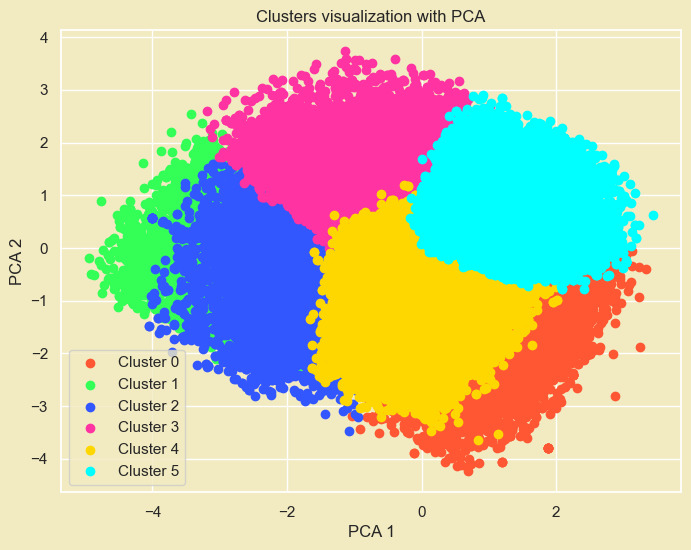

In [69]:
# Création des nuages des ponts
plt.figure(figsize=(8, 6))
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#FFD700', '#00FFFF', '#FF00FF'] 

for i in range(6):
    idx = df['cluster'] == i
    plt.scatter(reduced_features[idx, 0], reduced_features[idx, 1], c=colors[i], label=f'Cluster {i}')

plt.title('Clusters visualization with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
print(df['cluster'].value_counts())


cluster
5    28312
4    22626
3    20428
0    18564
2    12522
1    11547
Name: count, dtype: int64


In [71]:
#les statistiques de chaque cluster
numeric_cols = df.select_dtypes(include=['number']).columns
cluster_stats = df.groupby('cluster')[numeric_cols].mean()

print("Cluster Statistics:")
print(cluster_stats)


Cluster Statistics:
         popularity    duration_ms  explicit  danceability    energy  \
cluster                                                                
0         33.960353  222266.093086  0.008276      0.473317  0.829744   
1         30.023209  208895.888105  0.001947      0.387776  0.264847   
2         34.880291  219872.108557  0.002752      0.474410  0.359609   
3         33.278024  204647.555767  0.008003      0.690943  0.489697   
4         35.295191  227122.435076  0.008877      0.518428  0.796009   
5         31.674838  209274.997839  0.009129      0.702203  0.781946   

              key   loudness      mode  speechiness  acousticness  \
cluster                                                             
0        5.414835  -5.100736  0.643665     0.069776      0.126474   
1        4.953408 -10.580035  0.698450     0.044195      0.735733   
2        5.049114 -10.694894  0.688628     0.045725      0.588687   
3        5.340660 -10.305980  0.650039     0.057808      0

In [72]:
#fonction pour créer des histogrmmes:Moyenne des variables par cluster

def plot_histograms_by_category(data, cluster, numeric_columns, ncols=2, palette="viridis"):

    # Vérifications
    if cluster not in data.columns:
        print(f"La colonne '{cluster}' n'existe pas dans les données.")
        return
    for col in numeric_columns:
        if col not in data.columns:
            print(f"La colonne '{col}' n'existe pas dans les données.")
            return
    
    # Calculer les moyennes pour chaque colonne numérique
    avg_data = data.groupby(cluster)[numeric_columns].mean().reset_index()
    
    # Organisation des sous-graphiques
    nrows = (len(numeric_columns) + ncols - 1) // ncols  # Calcul du nombre de lignes nécessaires
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
    axes = axes.flatten()  # Aplatir pour un accès facile
    
    for i, col in enumerate(numeric_columns):
        sns.barplot(
            x=cluster, 
            y=col, 
            data=avg_data, 
            ax=axes[i], 
            palette=palette
        )
        axes[i].set_title(f"Moyenne de {col} par {cluster}", fontsize=14)
        axes[i].set_xlabel(cluster)
        axes[i].set_ylabel(f"Moyenne de {col}")
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    
    # Supprimer les axes inutilisés (s'il y en a)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Ajustement de l'affichage
    plt.tight_layout()
    plt.show()


C:\Users\Maha ben aissa\AppData\Local\Temp\ipykernel_12364\3239151280.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Maha ben aissa\AppData\Local\Temp\ipykernel_12364\3239151280.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Maha ben aissa\AppData\Local\Temp\ipykernel_12364\3239151280.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Maha ben aissa\AppData\Local\Temp\ipykernel_12364\3239151280.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

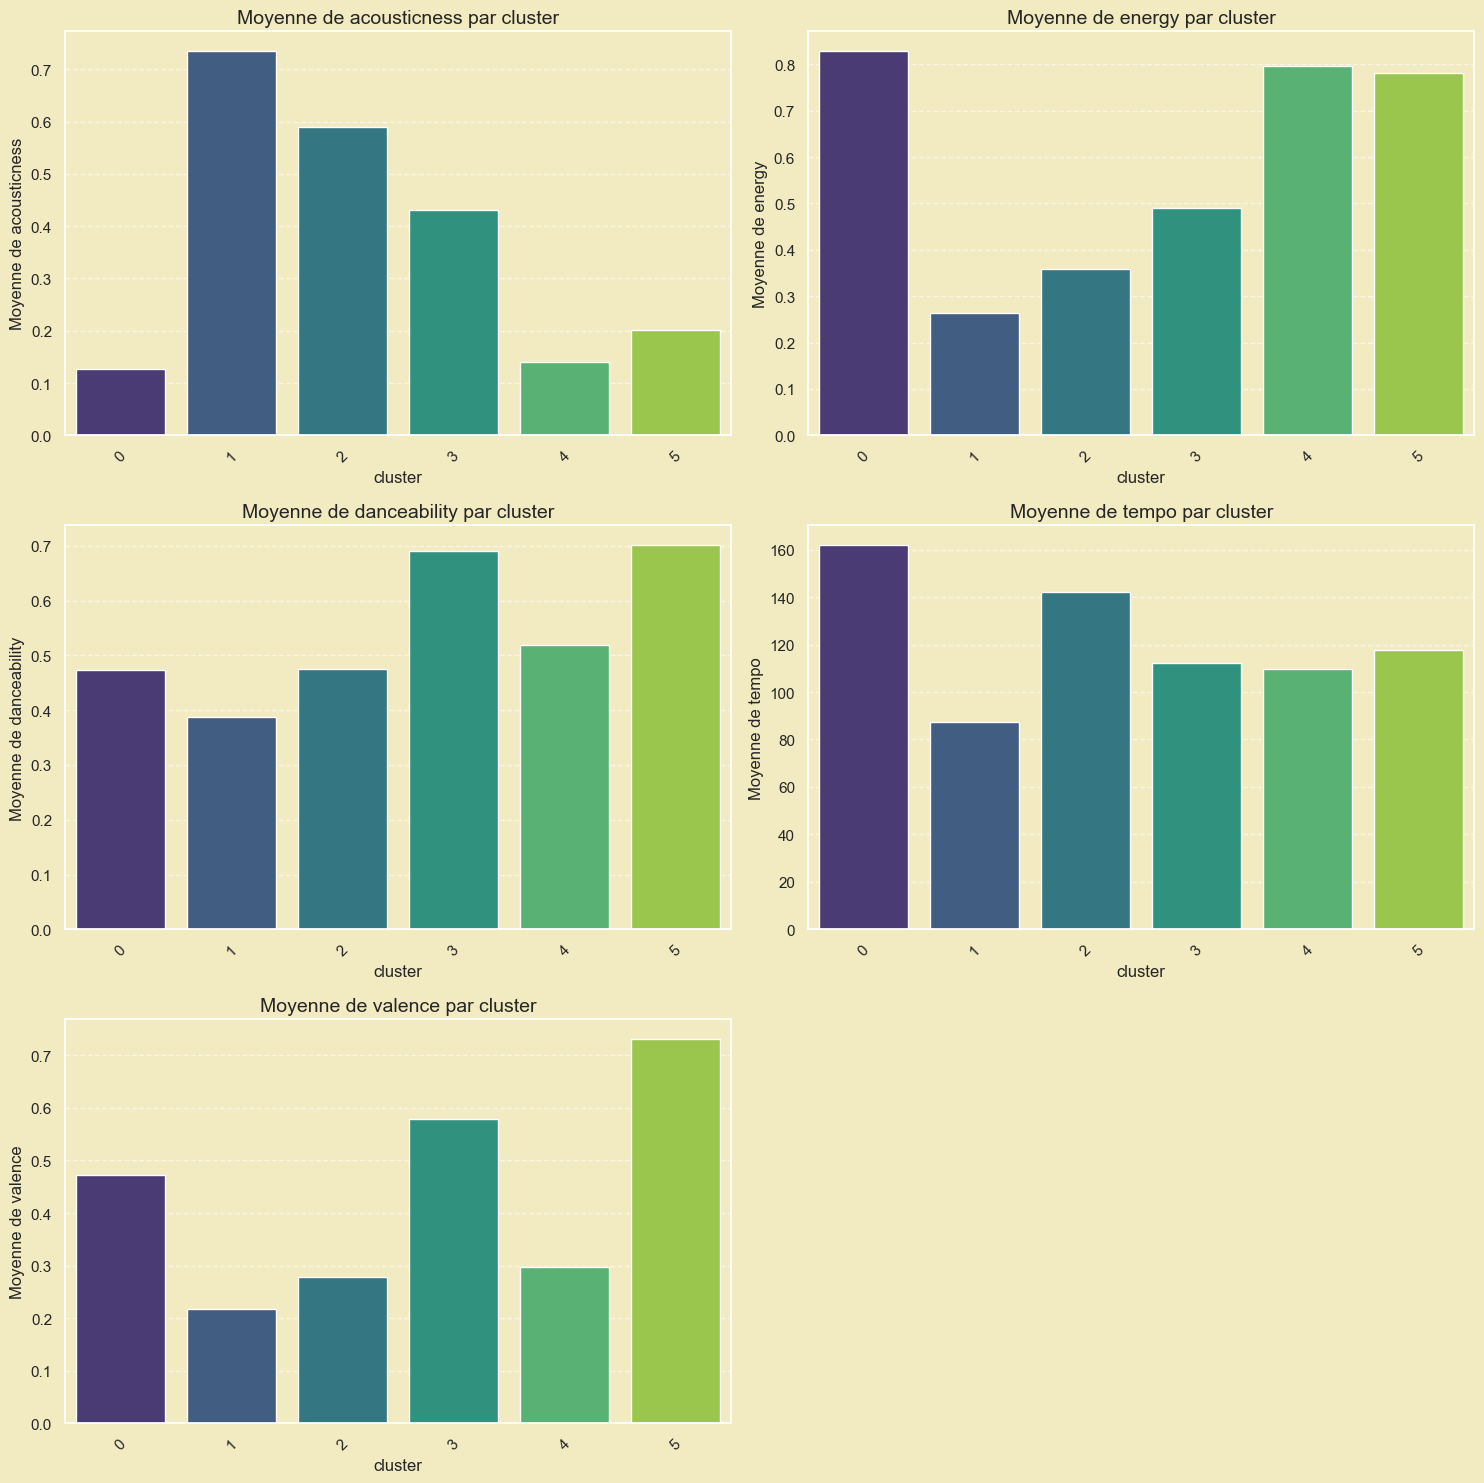

In [73]:
numeric_columns = ['acousticness', 'energy', 'danceability', 'tempo', 'valence']
plot_histograms_by_category(df, 'cluster', numeric_columns, ncols=2)


In [74]:
# Distribution des genres par cluster
if 'track_genre' in df.columns:
    cluster_genres = df.groupby('cluster')['track_genre'].value_counts(normalize=True)
    
    # Organiser les résultats par cluster et les afficher clairement
    for cluster_id in sorted(df['cluster'].unique()):
        print(f"\nCluster {cluster_id} Genre Distribution:")
        print(cluster_genres[cluster_id].sort_values(ascending=False).head(20))  # Affiche les 20 genres les plus fréquents



Cluster 0 Genre Distribution:
track_genre
hardstyle        0.040993
drum-and-bass    0.038892
happy            0.034799
j-idol           0.023217
dubstep          0.022140
metalcore        0.022086
punk             0.021601
power-pop        0.020793
punk-rock        0.020470
grunge           0.020039
heavy-metal      0.019985
metal            0.018638
black-metal      0.017938
hardcore         0.017561
dub              0.017453
j-rock           0.016968
garage           0.016106
pagode           0.014598
sertanejo        0.014437
death-metal      0.014383
Name: proportion, dtype: float64

Cluster 1 Genre Distribution:
track_genre
new-age              0.052654
opera                0.050922
ambient              0.047718
classical            0.046332
sleep                0.046159
romance              0.039751
disney               0.036200
iranian              0.035507
piano                0.033775
show-tunes           0.029358
guitar               0.025201
jazz                 0.025028
g

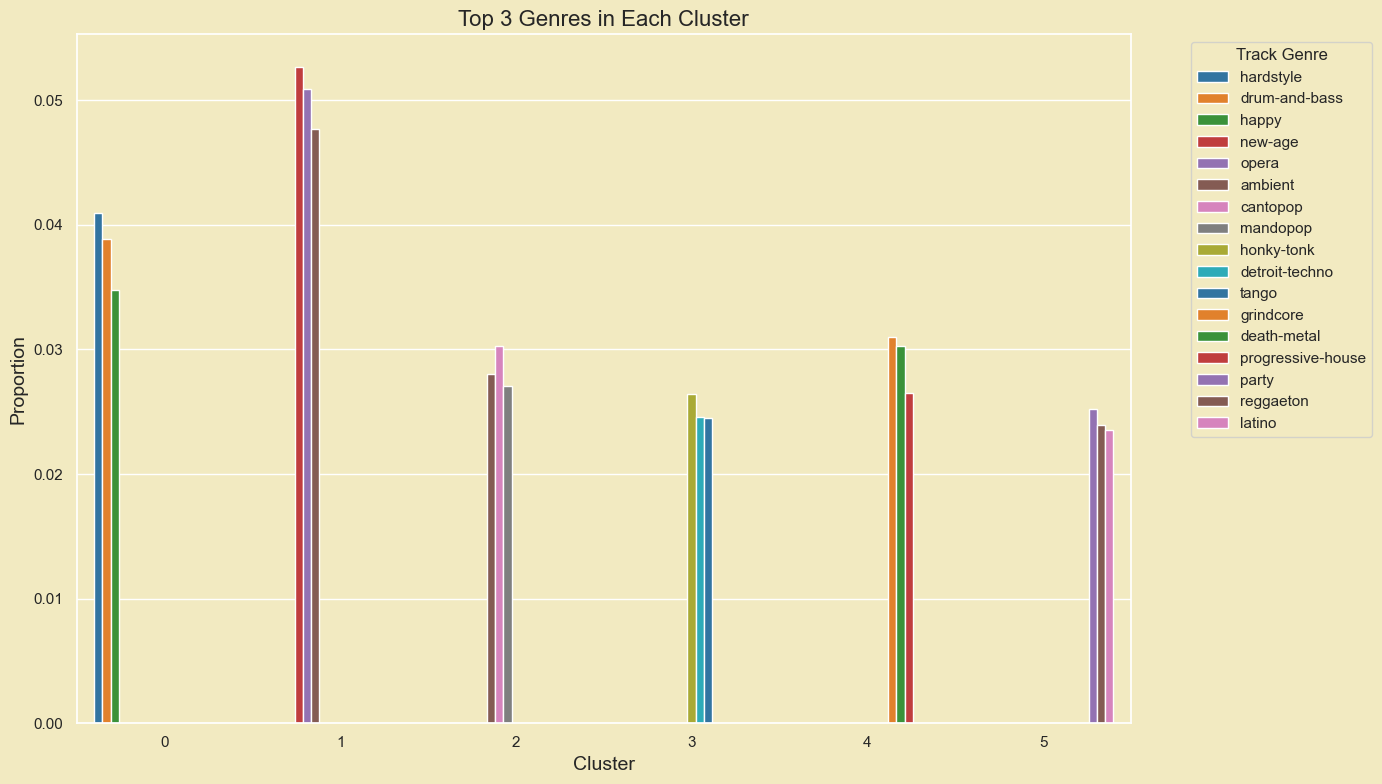

In [75]:
#Créer un graphe pour visualiser les genres dominants par cluster
if 'track_genre' in df.columns: # Vérifiez si la colonne 'track_genre' existe
    # Calculer la distribution des genres par cluster
    cluster_genres = df.groupby(['cluster', 'track_genre']).size().reset_index(name='count')

    # Calculer la proportion
    cluster_genres['proportion'] = cluster_genres.groupby('cluster')['count'].transform(lambda x: x / x.sum())

    # Trier par proportion dans chaque cluster
    cluster_genres_sorted = cluster_genres.sort_values(['cluster', 'proportion'], ascending=[True, False])

    # Garder les 3 genres dominants pour chaque cluster
    top_genres = cluster_genres_sorted.groupby('cluster').head(3)

    # Visualiser les genres dominants par cluster
    plt.figure(figsize=(14, 8))
    sns.barplot(
        x='cluster', y='proportion', hue='track_genre', 
        data=top_genres, palette='tab10'
    )
    
    # Ajouter des titres et des labels
    plt.title('Top 3 Genres in Each Cluster', fontsize=16)
    plt.xlabel('Cluster', fontsize=14)
    plt.ylabel('Proportion', fontsize=14)
    plt.legend(title='Track Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'track_genre' does not exist in the DataFrame.")


In [76]:
#affectation des titres aux clusters
cluster_titles = {
    0: "Intense et Énergétique",
    1: "Calme et sérin",
    2: "Doux et Culturel",
    3: "Éclectique et Dansant",
    4: "Électronique et Extrême",
    5: "Festif et Tropical"
}
df['music_category'] = df['cluster'].map(cluster_titles)

Classification

In [77]:
# Selection variables et label
X = num_cols
y = df['music_category']

# Encoder le label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalizer les variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [78]:
#Divier les données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=0)


In [79]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred,target_names=label_encoder.classes_))

Random Forest Classification Report:
                         precision    recall  f1-score   support

         Calme et sérin       0.97      0.96      0.97      4684
       Doux et Culturel       0.97      0.95      0.96      5099
     Festif et Tropical       0.98      0.98      0.98     11292
 Intense et Énergétique       0.97      0.97      0.97      7386
  Éclectique et Dansant       0.95      0.97      0.96      8202
Électronique et Extrême       0.96      0.97      0.97      8937

               accuracy                           0.97     45600
              macro avg       0.97      0.97      0.97     45600
           weighted avg       0.97      0.97      0.97     45600



In [80]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

K-Nearest Neighbors Classification Report:
                         precision    recall  f1-score   support

         Calme et sérin       0.89      0.88      0.88      4684
       Doux et Culturel       0.83      0.82      0.82      5099
     Festif et Tropical       0.87      0.92      0.89     11292
 Intense et Énergétique       0.89      0.86      0.87      7386
  Éclectique et Dansant       0.85      0.82      0.84      8202
Électronique et Extrême       0.86      0.84      0.85      8937

               accuracy                           0.86     45600
              macro avg       0.86      0.86      0.86     45600
           weighted avg       0.86      0.86      0.86     45600



In [81]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Decision Tree Classification Report:
                         precision    recall  f1-score   support

         Calme et sérin       0.94      0.96      0.95      4684
       Doux et Culturel       0.93      0.92      0.93      5099
     Festif et Tropical       0.96      0.97      0.97     11292
 Intense et Énergétique       0.96      0.95      0.96      7386
  Éclectique et Dansant       0.93      0.93      0.93      8202
Électronique et Extrême       0.95      0.95      0.95      8937

               accuracy                           0.95     45600
              macro avg       0.95      0.95      0.95     45600
           weighted avg       0.95      0.95      0.95     45600



In [82]:
model = SVC(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("SVC Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

SVC Report:
                         precision    recall  f1-score   support

         Calme et sérin       0.98      0.98      0.98      4684
       Doux et Culturel       0.97      0.97      0.97      5099
     Festif et Tropical       0.98      0.99      0.99     11292
 Intense et Énergétique       0.98      0.98      0.98      7386
  Éclectique et Dansant       0.98      0.98      0.98      8202
Électronique et Extrême       0.98      0.98      0.98      8937

               accuracy                           0.98     45600
              macro avg       0.98      0.98      0.98     45600
           weighted avg       0.98      0.98      0.98     45600



Cross validation

In [83]:
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'SVM': SVC(random_state=0)
}

# Fonction pour évaluer un classifieur
def evaluate_classifier(name, clf, X, y, cv=5):
    """
    Évalue un classifieur donné avec validation croisée.
    
    Parameters:
    - name (str): Le nom du classifieur.
    - clf: L'instance du modèle.
    - X: Les caractéristiques (features).
    - y: Les étiquettes (labels).
    - cv (int): Nombre de splits pour la validation croisée.
    """
    print(f"Évaluation de : {name}")
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    print(f"Accuracy moyenne: {scores.mean():.2f}")
    print(f"Écart-type de l'accuracy: +/- {scores.std() * 2:.2f}")
    print("-" * 50)



In [84]:

evaluate_classifier('Random Forest', classifiers['Random Forest'], X_scaled, y, cv=5)

Évaluation de : Random Forest
Accuracy moyenne: 0.96
Écart-type de l'accuracy: +/- 0.01
--------------------------------------------------


In [85]:

evaluate_classifier('K-Nearest Neighbors', classifiers['K-Nearest Neighbors'], X_scaled, y, cv=5)

Évaluation de : K-Nearest Neighbors
Accuracy moyenne: 0.85
Écart-type de l'accuracy: +/- 0.02
--------------------------------------------------


In [86]:

evaluate_classifier('Decision Tree', classifiers['Decision Tree'], X_scaled, y, cv=5)

Évaluation de : Decision Tree
Accuracy moyenne: 0.94
Écart-type de l'accuracy: +/- 0.01
--------------------------------------------------


In [87]:

evaluate_classifier('SVM', classifiers['SVM'], X_scaled, y, cv=5)

Évaluation de : SVM
Accuracy moyenne: 0.98
Écart-type de l'accuracy: +/- 0.01
--------------------------------------------------


Comparaison des modèles

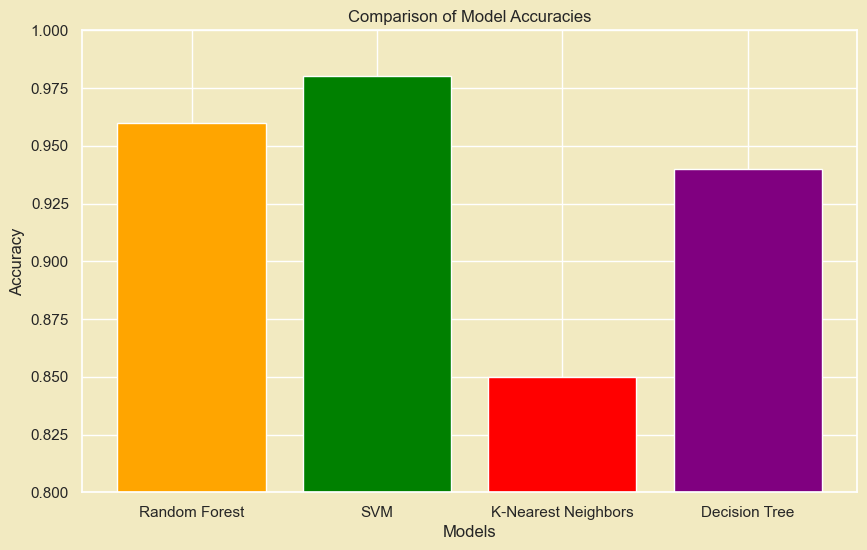

In [88]:
model_accuracies = {
    'Random Forest': 0.96,
    'SVM': 0.98,
    'K-Nearest Neighbors': 0.85,
    'Decision Tree': 0.94
}

# Création de l'histogramme 
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['orange', 'green', 'red', 'purple'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  
plt.show()

La fonction de recommendation

In [89]:
from sklearn.metrics.pairwise import cosine_similarity
# Liste des colonnes utilisées lors de l'entraînement
columns = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 
           'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
           'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# Ajoute les colonnes manquantes à l'entrée de l'utilisateur (avec des valeurs par défaut)
user_features = {
    'danceability': 0.7,
    'energy': 0.9,
    'loudness': -5,
    'valence': 0.8,
    'tempo': 120,
    'acousticness': 0.1,  
    'duration_ms': 210000, 
    'explicit': 0,  
    'instrumentalness': 0.2,  
    'key': 5,  
    'popularity': 50,  
    'mode': 1,  
    'speechiness': 0.05,  
    'liveness': 0.1,  
    'time_signature': 4  
}

# Crée un DataFrame avec les caractéristiques de l'utilisateur, en utilisant les colonnes d'origine
user_data = pd.DataFrame([user_features], columns=columns).fillna(0)  # Remplit les NaN avec 0

# Normalise les caractéristiques de l'utilisateur
try:
    user_scaled = scaler.transform(user_data)
except ValueError as e:
    print("Erreur lors de la normalisation des données de l'utilisateur :", e)
    user_scaled = None

if user_scaled is not None:
    # Prédire la catégorie musicale
    category = model.predict(user_scaled)[0]

    # Trouver les morceaux dans la même catégorie
    recommendations = df[df['music_category'] == category]
    recommendations = recommendations.drop_duplicates(subset=['track_name', 'artists'])

    # Extraire les caractéristiques nécessaires pour la similarité cosinus
    features_to_compare = columns  # Les mêmes colonnes que pour l'entraînement
    song_features = recommendations[features_to_compare]

# Calculer la similarité cosinus entre l'utilisateur et chaque chanson
    similarities = cosine_similarity(user_scaled, song_features)[0]

# Ajouter les scores de similarité au DataFrame des recommandations
    recommendations['similarity'] = similarities

# Trier les chansons par similarité décroissante
    recommendations = recommendations.sort_values(by='similarity', ascending=False)

# Afficher quelques recommandations
    print(f"Recommandations musicales pour la catégorie '{category}':")
    print(recommendations[['track_name', 'artists', 'album_name']].head())
else:
    print("Impossible de générer des recommandations.")


Recommandations musicales pour la catégorie 'Festif et Tropical':
                                              track_name  \
26003  Sofia the First Main Title Theme - From "Sofia...   
94100                midnight sun (ramzoid x hal walker)   
14174                                    Baby Bumble Bee   
14000                                         Baby Shark   
14328            Days Of The Week (Addams Family Parody)   

                            artists                               album_name  
26003  Cast - Sofia the First;Sofia                          Sofia the First  
94100                     ZOID LAND      midnight sun (ramzoid x hal walker)  
14174                  Dennis Scott    Kids All-Time Favorite Nursery Rhymes  
14000                      Pinkfong                    Pinkfong Animal Songs  
14328         Martin and Rose Music  Sing With Me A Kids Pop Music Adventure  
